In [3]:
import tweepy
import pandas as pd

In [4]:
consumer_key = '41kQtMM8K3iVa9rJMrV2EheaT'
consumer_secret = 'MbJoePmBGFg0GMmBA79ZFxCRAddZh1pMsavPt3so37rmdgHu7r'
access_token = '757947804119695360-e1yB1Zvj2B673Aw5Wavlcnq5YQuYOU4'
access_token_secret = 'Sk62eIgyhoR7SmTpqygDpzq7HdBBRZqFDdmvScD0Vq27K'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
me = api.get_user(screen_name = 'stevehedden')
me.id

1210627806

In [13]:
user_list = ["1210627806"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

445


In [14]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 1210627806 #Set my user ID as the source 

In [15]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

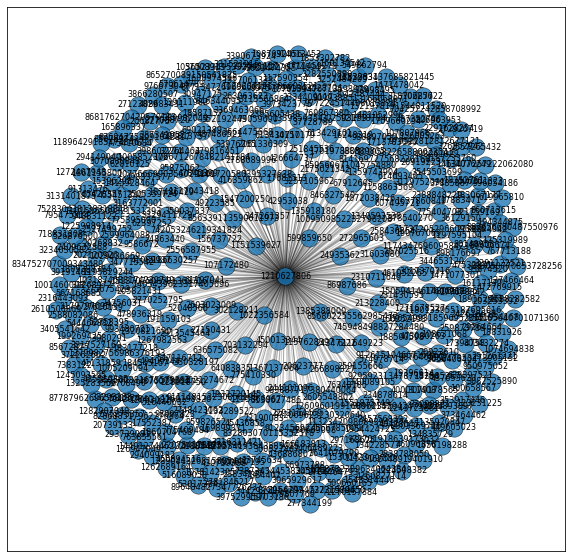

In [16]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [29]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    try:
        
        # fetching the user
        user = api.get_user(user_id = userID)

        # fetching the followers_count
        followers_count = user.followers_count

        for page in tweepy.Cursor(api.get_follower_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.errors.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

1.565499318596952e+18


AttributeError: module 'tweepy.errors' has no attribute 'TweepError'

Get user info

In [19]:
# using get_user with id
user_id = "103770785"
user = api.get_user(user_id = user_id)
  
# printing the name of the user
print("The id " + user_id +
      " corresponds to the user with the name : " +
      user.name)

The id 103770785 corresponds to the user with the name : Twitter India


In [23]:

# printing the information
print("The id is : " + str(user.id))
print("The id_str is : " + user.id_str)
print("The name is : " + user.name)
print("The screen_name is : " + user.screen_name)
print("The location is : " + str(user.location))
print("The profile_location is : " + str(user.profile_location)) 
print("Is the account protected? : " + str(user.protected))
print("The followers_count is : " + str(user.followers_count))
print("The friends_count is : " + str(user.friends_count))
print("The listed_count is : " + str(user.listed_count))
print("The account was created on : " + str(user.created_at))
print("The favourites_count is : " + str(user.favourites_count))
print("The geo_enabled is : " + str(user.geo_enabled))
print("The verified is : " + str(user.verified))
print("The statuses_count is : " + str(user.statuses_count))
print("The lang is : " + str(user.lang))
print("The contributors_enabled is : " + str(user.contributors_enabled))
print("The is_translator is : " + str(user.is_translator))
print("The is_translation_enabled is : " + str(user.is_translation_enabled))
print("The profile_use_background_image is : " + str(user.profile_use_background_image))
print("The has_extended_profile is : " + str(user.has_extended_profile))
print("The default_profile is : " + str(user.default_profile))
print("The default_profile_image is : " + str(user.default_profile_image))

The id is : 103770785
The id_str is : 103770785
The name is : Twitter India
The screen_name is : TwitterIndia
The location is : India
The profile_location is : None
Is the account protected? : False
The followers_count is : 2433728
The friends_count is : 0
The listed_count is : 2803
The account was created on : 2010-01-11 05:44:35+00:00
The favourites_count is : 542
The geo_enabled is : True
The verified is : True
The statuses_count is : 6627
The lang is : None
The contributors_enabled is : False
The is_translator is : False
The is_translation_enabled is : False
The profile_use_background_image is : True
The has_extended_profile is : False
The default_profile is : False
The default_profile_image is : False
